In [2]:
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [3]:
#read csv files

train=pd.read_csv("train.csv",low_memory=False)
test=pd.read_csv("test.csv")
store=pd.read_csv("store.csv")


<AxesSubplot:>

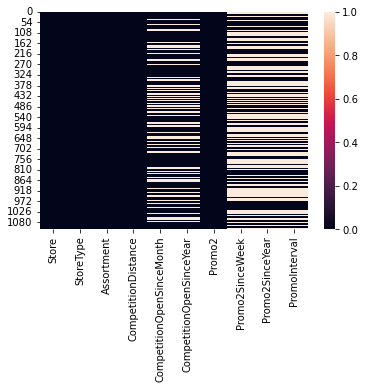

In [37]:
#to check the null data for Store dataset
sns.heatmap(store.isnull())



<AxesSubplot:>

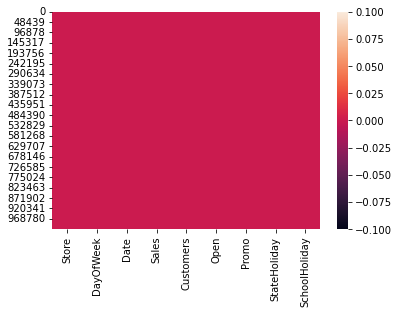

In [38]:
#to check the null data for the traning dataset
sns.heatmap(train.isnull())


In [4]:
#check the percentage of null values in each of the column of the dataset
percent_missing = store.isnull().sum() * 100 / len(store)
percent_missing

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

In [ ]:
#Cleaning the Dataset
# As we can see that there are around 6 columns that have missing data.So eventuallly we need to deal with them

In [5]:
#for "CompetitionDistance" we can just fill the blanks with the mean of all the competition distances

store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean(),inplace=True)

In [169]:
store[store.CompetitionOpenSinceMonth.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [6]:
aa_df=store[(store.StoreType == "a") & (store.Assortment == "a")]
aa_df['CompetitionOpenSinceMonth'].fillna(aa_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
# ab_df=store[(store.StoreType == "a") & (store.Assortment == "b")]
# ab_df['CompetitionOpenSinceMonth'].fillna(ab_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
ac_df=store[(store.StoreType == "a") & (store.Assortment == "c")]
ac_df['CompetitionOpenSinceMonth'].fillna(ac_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)

ba_df=store[(store.StoreType == "b") & (store.Assortment == "a")]
ba_df['CompetitionOpenSinceMonth'].fillna(ba_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
bb_df=store[(store.StoreType == "b") & (store.Assortment == "b")]
bb_df['CompetitionOpenSinceMonth'].fillna(bb_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
bc_df=store[(store.StoreType == "b") & (store.Assortment == "c")]
bc_df['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0], inplace=True)

ca_df=store[(store.StoreType == "c") & (store.Assortment == "a")]
ca_df['CompetitionOpenSinceMonth'].fillna(ca_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
# cb_df=store[(store.StoreType == "c") & (store.Assortment == "b")]
# cb_df['CompetitionOpenSinceMonth'].fillna(cb_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
cc_df=store[(store.StoreType == "c") & (store.Assortment == "c")]
cc_df['CompetitionOpenSinceMonth'].fillna(cc_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)

da_df=store[(store.StoreType == "d") & (store.Assortment == "a")]
da_df['CompetitionOpenSinceMonth'].fillna(da_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
# db_df=store[(store.StoreType == "d") & (store.Assortment == "b")]
# db_df['CompetitionOpenSinceMonth'].fillna(db_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
dc_df=store[(store.StoreType == "d") & (store.Assortment == "c")]
dc_df['CompetitionOpenSinceMonth'].fillna(dc_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)

mylist=[aa_df,ac_df,ba_df,bb_df,bc_df,ca_df,cc_df,da_df,dc_df]
all_df=pd.concat(mylist)


C:\Users\sumit\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [59]:
all_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1082,1083,d,c,11540.0,9.0,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1086,1087,d,c,2210.0,11.0,2011.0,0,NaN,NaN,NaN
1100,1101,d,c,4060.0,9.0,2012.0,0,NaN,NaN,NaN
1102,1103,d,c,1340.0,10.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [7]:
store.update(all_df)

In [8]:
#for CompetitionOpenSinceMonth and CompetitionOpenSinceYear

# store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0],inplace=True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0],inplace=True)


In [9]:
#for "Promo2SinceWeek","Promo2SinceYear" and "PromoInterval" we can observe that wherever the value for "Promo2" is 0 then the
#the subsequent three fields are blank
#thus we subtitute all those values by zero
store['Promo2SinceWeek'].fillna(0,inplace=True)
store['Promo2SinceYear'].fillna(0,inplace=True)
store['PromoInterval'].fillna(0,inplace=True)



In [40]:
#Check the first 10 elements of the datset
store.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [59]:
merged_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,31/07/2015,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,30/07/2015,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,29/07/2015,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,28/07/2015,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,27/07/2015,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,05/01/2013,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,04/01/2013,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,03/01/2013,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,02/01/2013,3697,305,1,0,0,1


In [10]:
merged_df=pd.merge(store,train,on='Store')
merged_df.groupby(['StoreType']).mean(['Sales']).Sales.agg(["max"])

max    10058.837334
Name: Sales, dtype: float64

In [115]:
merged_df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
dtype: object

In [64]:
#As State holdidays have some '0's as strings we need to convert them to numeric 0. 
merged_df['StateHoliday'].loc[merged_df['StateHoliday'] == 0] = '0'

C:\Users\sumit\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
#EDA

#Effect of Promo on the sales

train.groupby(['SchoolHoliday']).sum(['Sales'])

,Store,DayOfWeek,Sales,Customers,Open,Promo
SchoolHoliday,,,,,,
0,466480967,3500415,4696260531,516035131,680935,305978
1,101558777,566733,1176920092,128006624,163457,82102


In [12]:
# extracting year and month from Date column
merged_df['Year'] = merged_df['Date'].apply(lambda x : int(str(x)[6:10]))
merged_df['Month'] =merged_df['Date'].apply(lambda x : int(str(x)[3:5]))
merged_df['Day'] =merged_df['Date'].apply(lambda x : int(str(x)[0:2]))

In [13]:
#Dropping the Date column
merged_df.drop('Date',axis=1,inplace=True) 

In [196]:
merged_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5,5263,555,1,1,0,1,2015,7
1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4,5020,546,1,1,0,1,2015,7
2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,3,4782,523,1,1,0,1,2015,7
3,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2,5011,560,1,1,0,1,2015,7
4,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,1,6102,612,1,1,0,1,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,6,4771,339,1,0,0,1,2013,1
1017205,1115,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,5,4540,326,1,0,0,1,2013,1
1017206,1115,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,4,4297,300,1,0,0,1,2013,1
1017207,1115,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,3,3697,305,1,0,0,1,2013,1


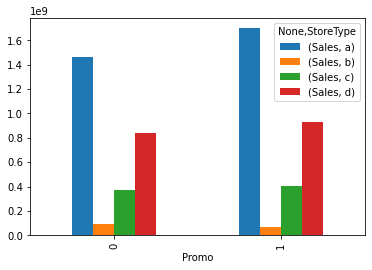

[Text(0.5, 1.0, 'Sales on Promo')]

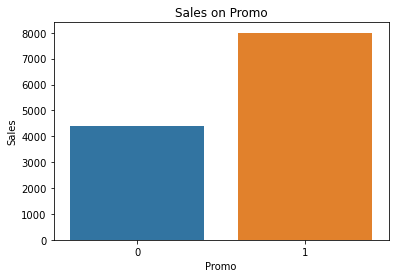

In [170]:
#Effect of Promo on Sales


df_promo = merged_df.filter(['StoreType','Sales','Promo'])
df_promo.groupby(['Promo','StoreType']).sum().unstack().plot.bar()
plt.show()

sns.barplot(x='Promo',y='Sales',data=merged_df).set(title='Sales on Promo')

C:\Users\sumit\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


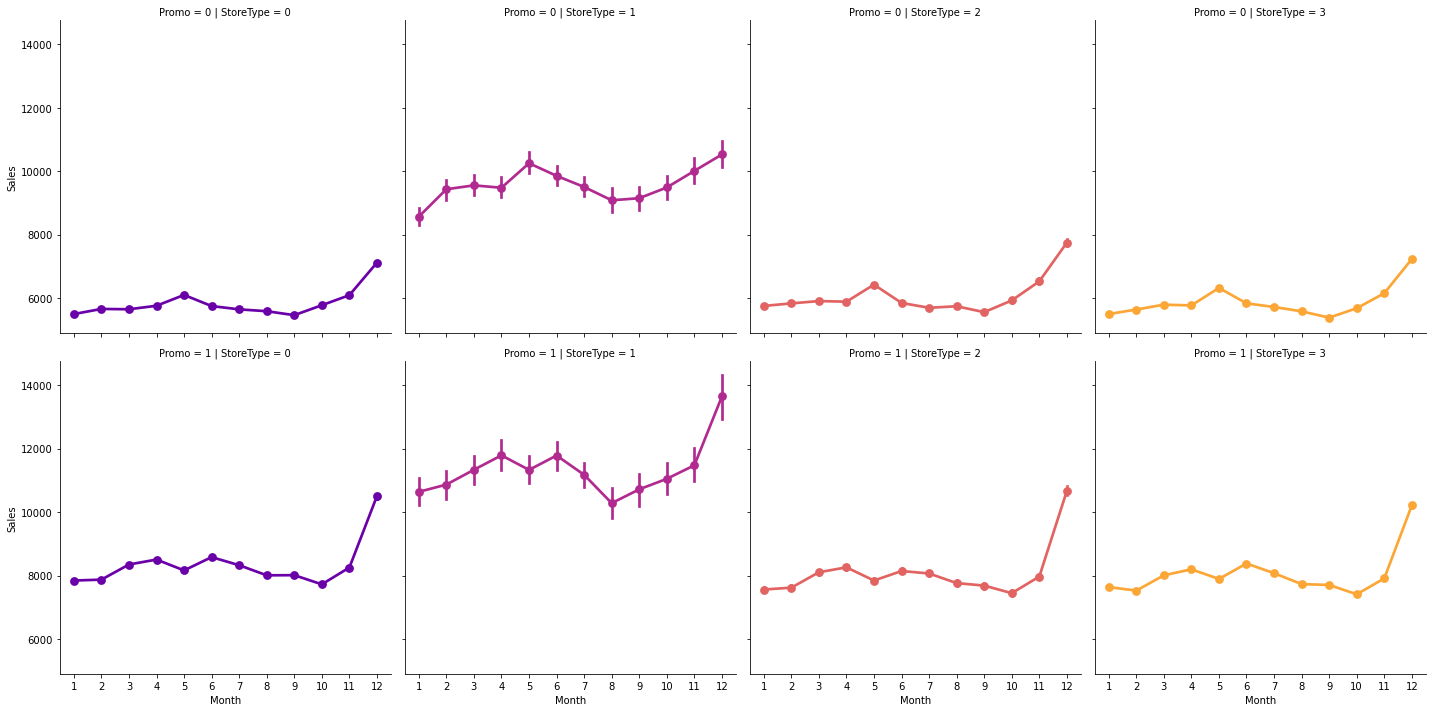

In [113]:
# sales trends
sns.factorplot(data = merged_df, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               ) 

[Text(0.5, 1.0, 'Sales on School Holiday')]

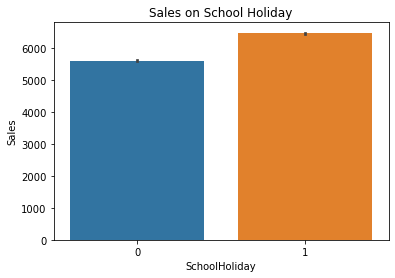

In [53]:
sns.barplot(x='SchoolHoliday',y='Sales',data=merged_df).set(title='Sales on School Holiday')

[Text(0.5, 1.0, 'Sales on State Holiday')]

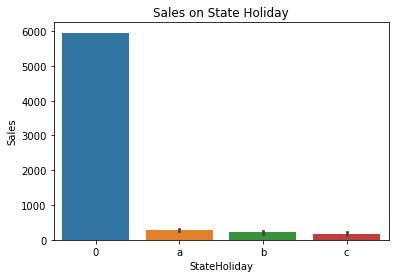

In [186]:


sns.barplot(x='StateHoliday',y='Sales',data=merged_df).set(title='Sales on State Holiday')

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
0,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
1,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
2,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
3,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


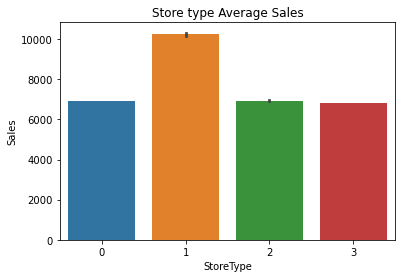

In [101]:
#Store Type average sales for the given period


sns.barplot(x='StoreType',y='Sales',data=merged_df).set(title='Store type Average Sales')

merged_df.groupby('StoreType')['Sales'].describe()


[Text(0.5, 1.0, 'Assortment type Average Sales')]

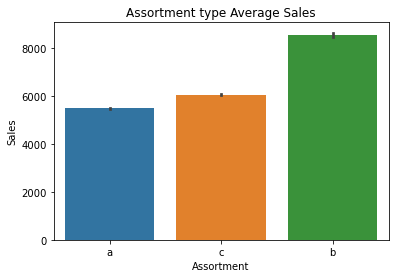

In [58]:
#Assortment Type average sales for the given period

sns.barplot(x='Assortment',y='Sales',data=merged_df).set(title='Assortment type Average Sales')

[Text(0.5, 1.0, 'Average Sales each day a week')]

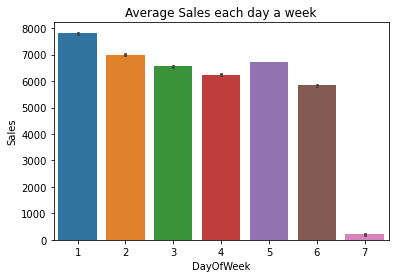

In [15]:
#Assortment Type average sales for the given period

sns.barplot(x='DayOfWeek',y='Sales',data=merged_df).set(title='Average Sales each day a week')

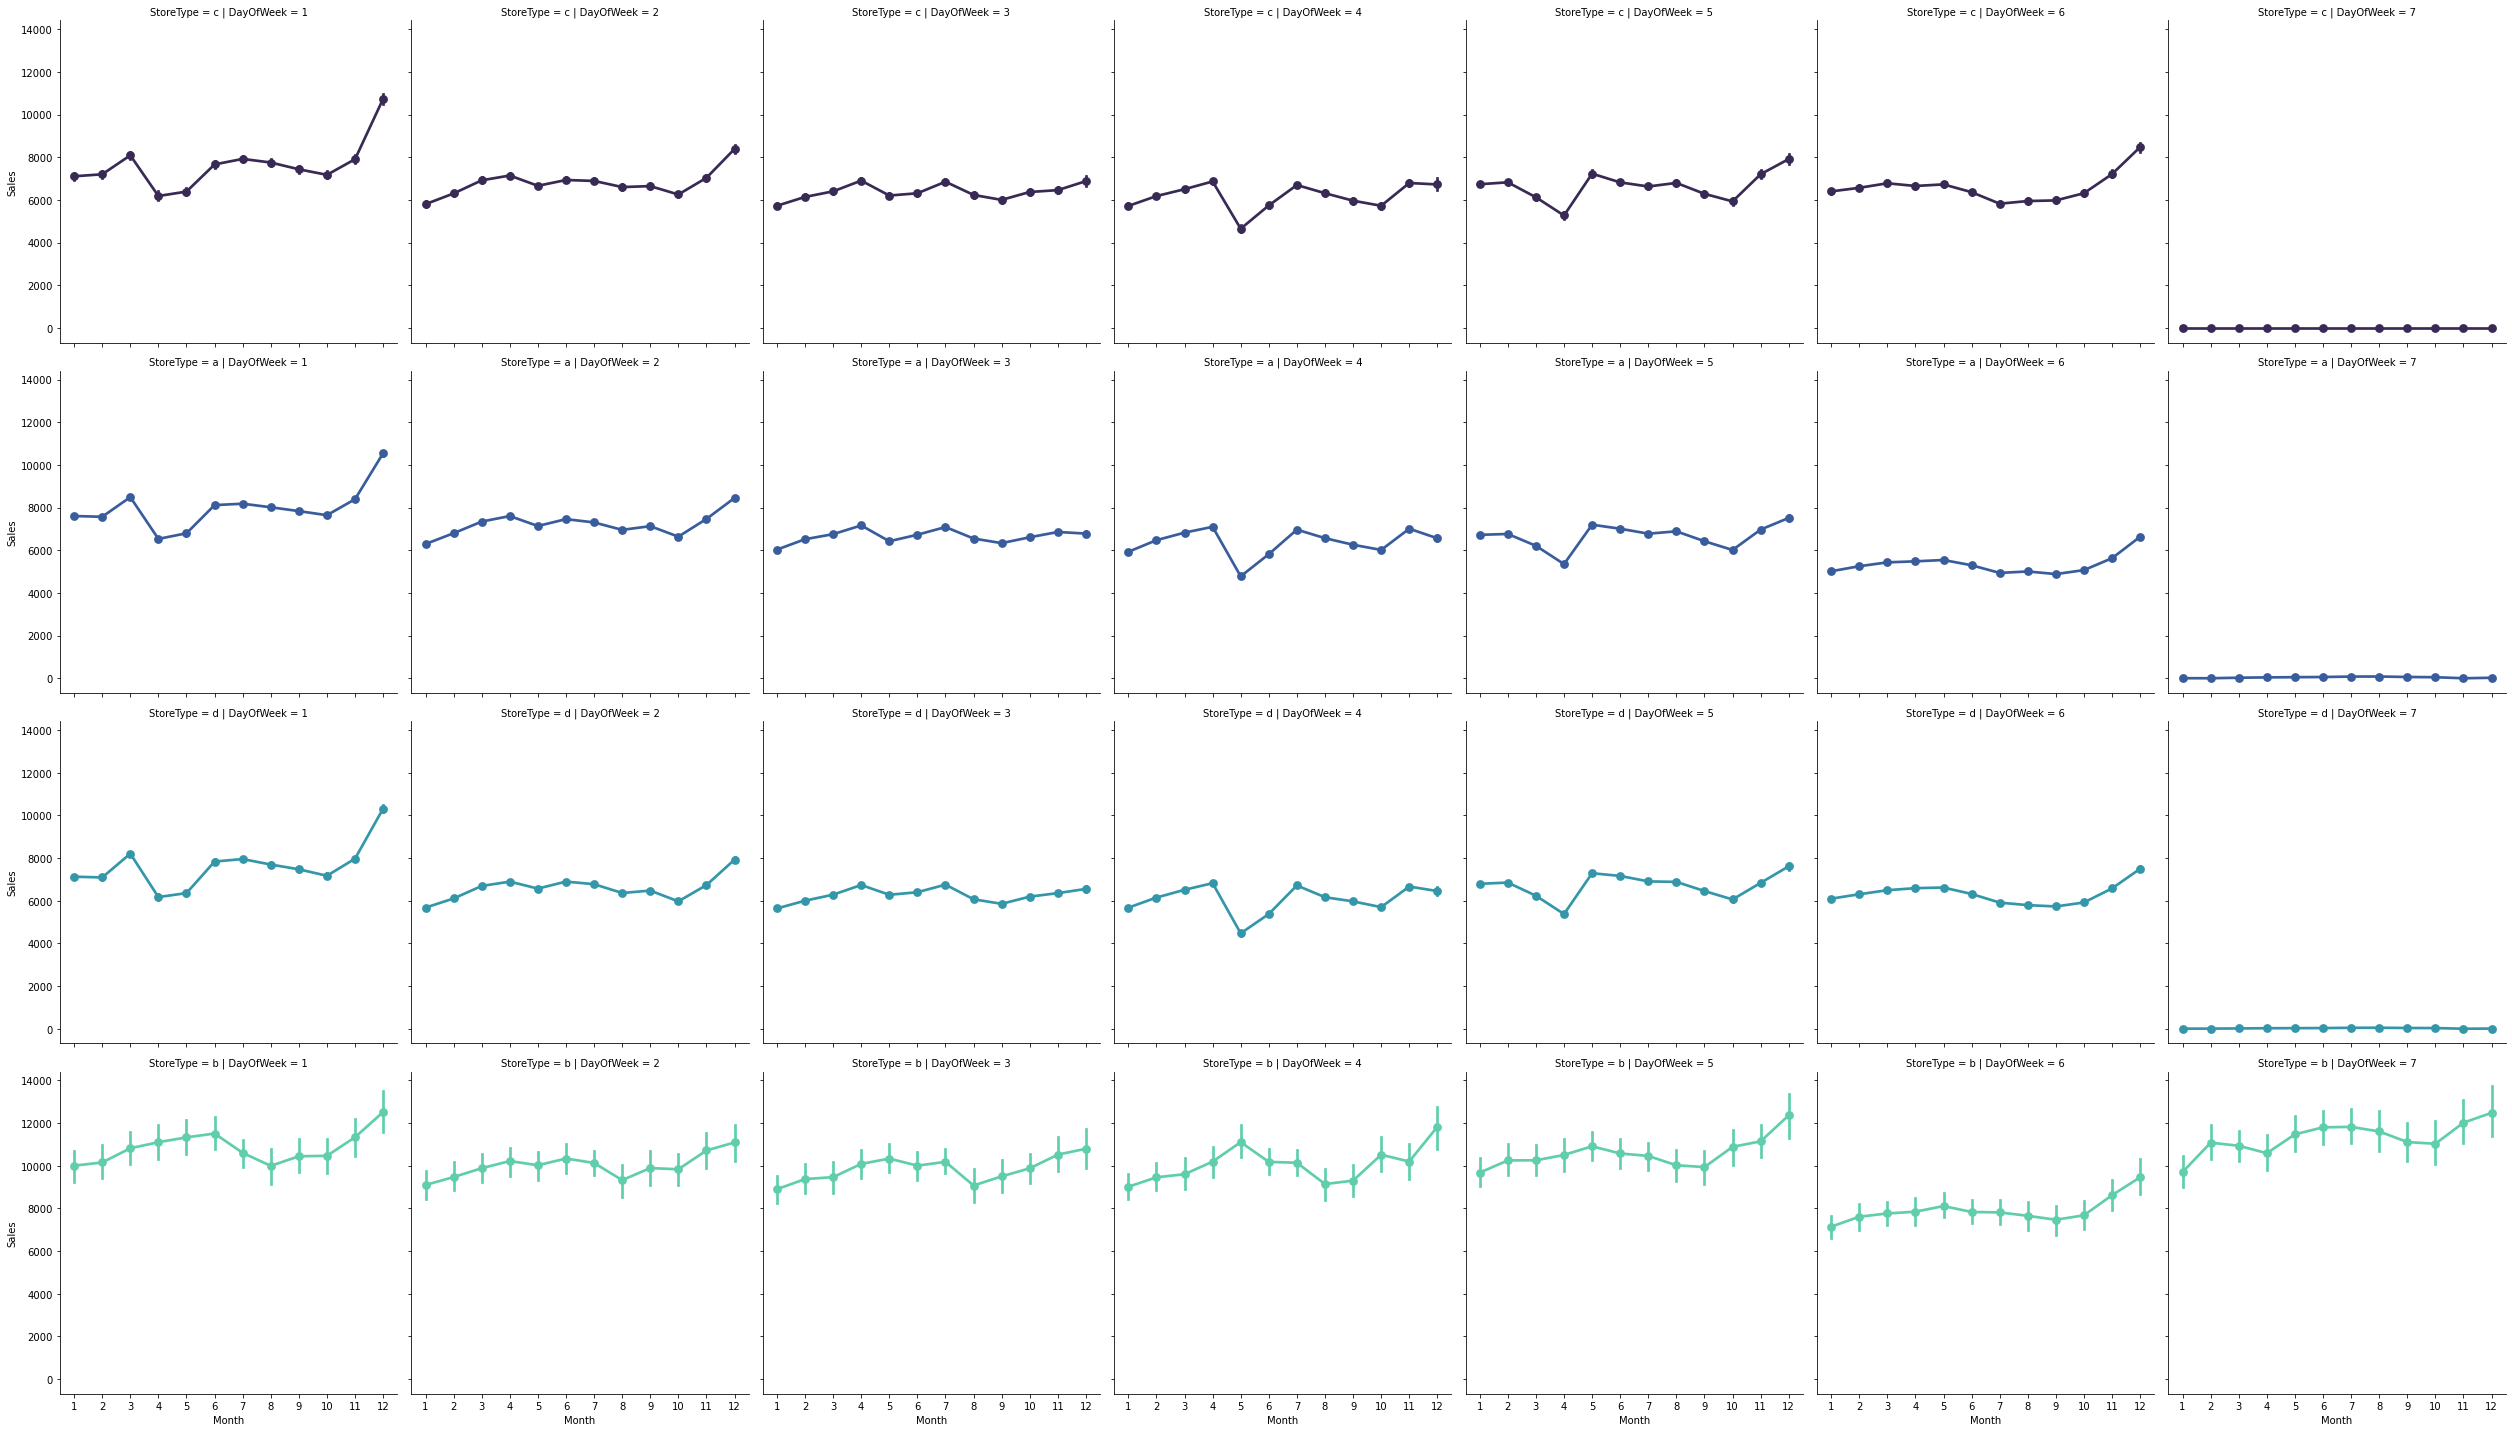

In [14]:
# sales trends
sns.factorplot(data = merged_df, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', # per store type in cols
               palette = 'mako',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
            ) 

Text(0, 0.5, 'Sales in €')

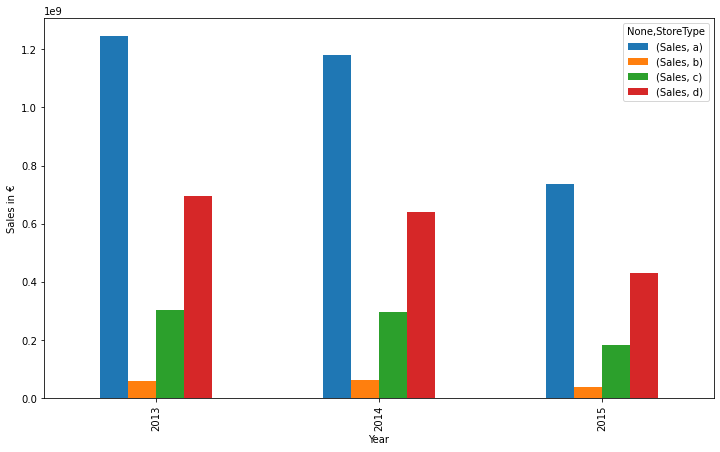

In [172]:
#Yearly sales for each Store type

df = merged_df.filter(['Year', 'StoreType','Sales'])
dy=df.groupby(['Year','StoreType']).sum().unstack().plot.bar(figsize=(12,7))
dy.set_ylabel('Sales in €')

Text(0, 0.5, 'Sales in €')

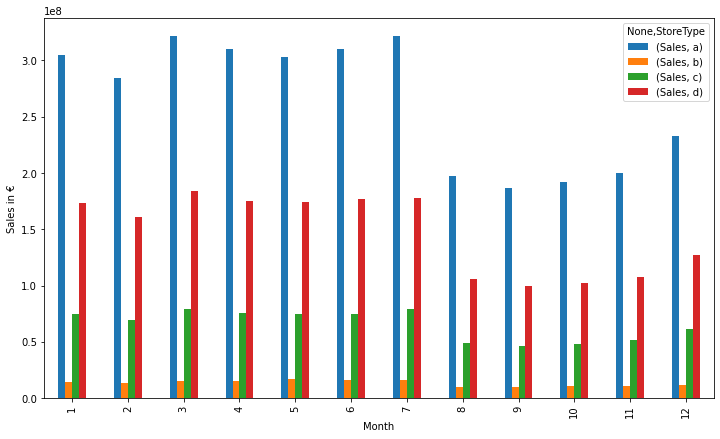

In [171]:
#Monthly sales for each Store type

df_month = merged_df.filter(['Month', 'StoreType','Sales'])
dm=df_month.groupby(['Month','StoreType']).sum().unstack().plot.bar(figsize=(12,7))
dm.set_ylabel('Sales in €')

In [ ]:
#finding out the Z-score




<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

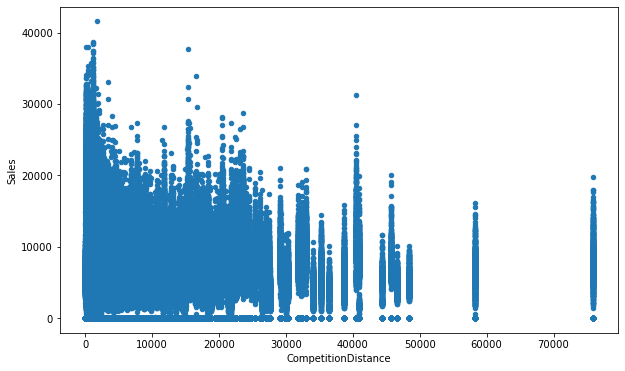

In [174]:
#find out 
merged_df.plot(x='CompetitionDistance',y='Sales',kind='scatter',figsize =(10,6))

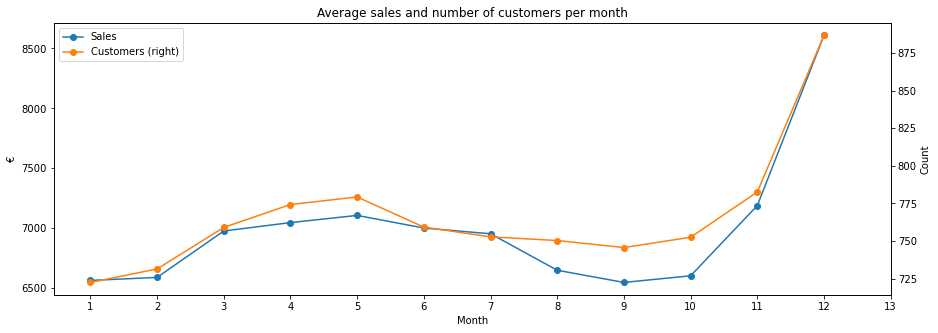

In [96]:
ax = merged_df.groupby('Month')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')
ax.set_ylabel('€')
ax.right_ax.set_ylabel('Count')
ax.set_xticks(range(1,14))
plt.title('Average sales and number of customers every month');

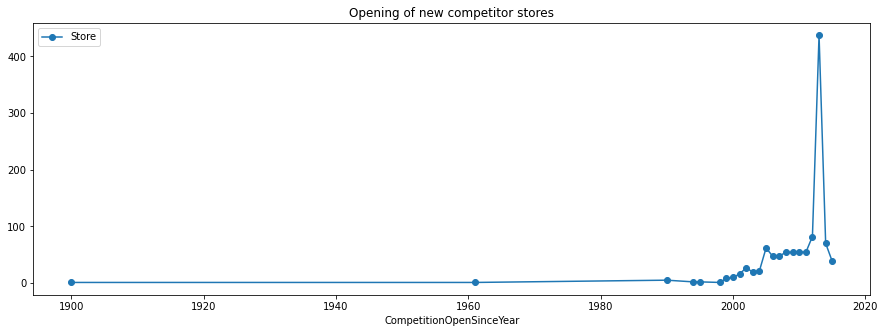

In [29]:
#Count of Competitor stores opened through the years
df_store_opening = store.filter(['CompetitionOpenSinceYear','Store'])
ax = df_store_opening.groupby('CompetitionOpenSinceYear').count().plot(figsize=(15,5), marker='o')
plt.title('Opening of new competitor stores');

In [28]:
ax = df_avg.groupby('CompetitionOpenSinceYear').count()
ax

,Store
CompetitionOpenSinceYear,
1900.0,1
1961.0,1
1990.0,5
1994.0,2
1995.0,2
1998.0,1
1999.0,8
2000.0,10
2001.0,16


AttributeError: 'AxesSubplot' object has no attribute 'right_ax'

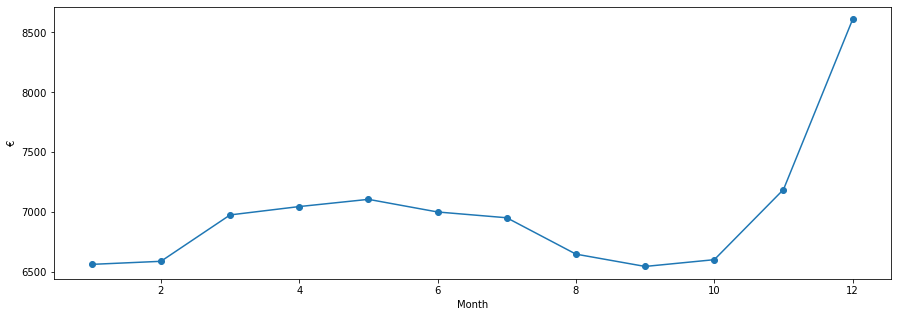

In [32]:
ax = merged_df.groupby('Month')['Sales'].mean().plot(figsize=(15,5), marker='o')
ax.set_ylabel('€')
ax.right_ax.set_ylabel('Count')
ax.set_xticks(range(1,20))
plt.title('Average sales and number of customers per month');

In [188]:
merged_df.dtypes


Store                          int64
StoreType                      int32
Assortment                     int32
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int32
SchoolHoliday                  int64
Year                           int64
Month                          int64
dtype: object

In [68]:
merged_df['PromoInterval'].astype(str)
merged_df['PromoInterval'].loc[merged_df['PromoInterval'] == 0] = '0'

C:\Users\sumit\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [69]:
#Encoding the categorical variables to Numeric

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

merged_df['StoreType'] = label_encoder.fit_transform(merged_df['StoreType'])
merged_df['Assortment'] = label_encoder.fit_transform(merged_df['Assortment'])
merged_df['StateHoliday'] = label_encoder.fit_transform(merged_df['StateHoliday'])
merged_df['PromoInterval'] = label_encoder.fit_transform(merged_df['PromoInterval'])



In [193]:
merged_df.head(100)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5,31/07/2015,5263,555,1,1,0,1,2015,7
1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4,30/07/2015,5020,546,1,1,0,1,2015,7
2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,3,29/07/2015,4782,523,1,1,0,1,2015,7
3,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2,28/07/2015,5011,560,1,1,0,1,2015,7
4,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,1,27/07/2015,6102,612,1,1,0,1,2015,7
5,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,7,26/07/2015,0,0,0,0,0,0,2015,7
6,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,6,25/07/2015,4364,500,1,0,0,0,2015,7
7,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5,24/07/2015,3706,459,1,0,0,0,2015,7
8,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4,23/07/2015,3769,503,1,0,0,0,2015,7
9,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,3,22/07/2015,3464,463,1,0,0,0,2015,7


In [154]:
#Correleration matric to check which features are strongly related
correlation=merged_df.corr()
correlation

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
Store,1.000000,-0.021149,0.005733,-0.027027,-0.012595,-0.000788,0.007728,0.010853,0.007760,0.001221,0.000343,0.007723,0.033991,NaN,-0.000015,0.002043,0.000526,0.000300,0.001371,-0.000127
StoreType,-0.021149,1.000000,0.230834,0.074758,-0.081790,0.043016,0.089364,0.060417,0.089308,0.088836,-0.001974,-0.016211,-0.194690,NaN,0.000324,-0.004435,-0.002263,-0.001492,-0.007643,0.000281
Assortment,0.005733,0.230834,1.000000,0.149924,0.156241,0.092994,0.008477,-0.030117,0.008525,0.039660,0.001215,0.109015,0.007242,NaN,-0.000333,-0.000626,-0.002714,0.002034,0.008352,0.000122
CompetitionDistance,-0.027027,0.074758,0.149924,1.000000,-0.041944,0.022746,-0.141786,-0.124714,-0.141848,-0.131053,0.005535,-0.036401,-0.148425,NaN,-0.002389,0.007091,-0.004273,0.000624,0.003840,-0.000228
CompetitionOpenSinceMonth,-0.012595,-0.081790,0.156241,-0.041944,1.000000,-0.010869,-0.018003,-0.036277,-0.017928,-0.014827,-0.002428,-0.026518,-0.033665,NaN,0.001096,-0.009703,-0.000392,-0.000670,-0.001030,0.000395
CompetitionOpenSinceYear,-0.000788,0.043016,0.092994,0.022746,-0.010869,1.000000,-0.022000,-0.027012,-0.022019,-0.024661,0.001459,0.010496,0.006942,NaN,-0.000521,0.002273,0.000385,0.000839,0.003586,-0.000128
Promo2,0.007728,0.089364,0.008477,-0.141786,-0.018003,-0.022000,1.000000,0.759536,0.999999,0.905470,-0.003252,-0.127556,-0.202207,NaN,-0.000316,-0.010152,-0.008244,-0.005696,-0.025807,0.001355
Promo2SinceWeek,0.010853,0.060417,-0.030117,-0.124714,-0.036277,-0.027012,0.759536,1.000000,0.759350,0.679887,-0.002736,-0.058493,-0.130864,NaN,-0.000795,-0.009789,-0.008069,-0.006905,-0.031721,0.001450
Promo2SinceYear,0.007760,0.089308,0.008525,-0.141848,-0.017928,-0.022019,0.999999,0.759350,1.000000,0.905533,-0.003249,-0.127581,-0.202180,NaN,-0.000317,-0.010146,-0.008247,-0.005697,-0.025812,0.001356
PromoInterval,0.001221,0.088836,0.039660,-0.131053,-0.014827,-0.024661,0.905470,0.679887,0.905533,1.000000,-0.002700,-0.120710,-0.184190,NaN,-0.000343,-0.008520,-0.007899,-0.004885,-0.023030,0.001151


<AxesSubplot:>

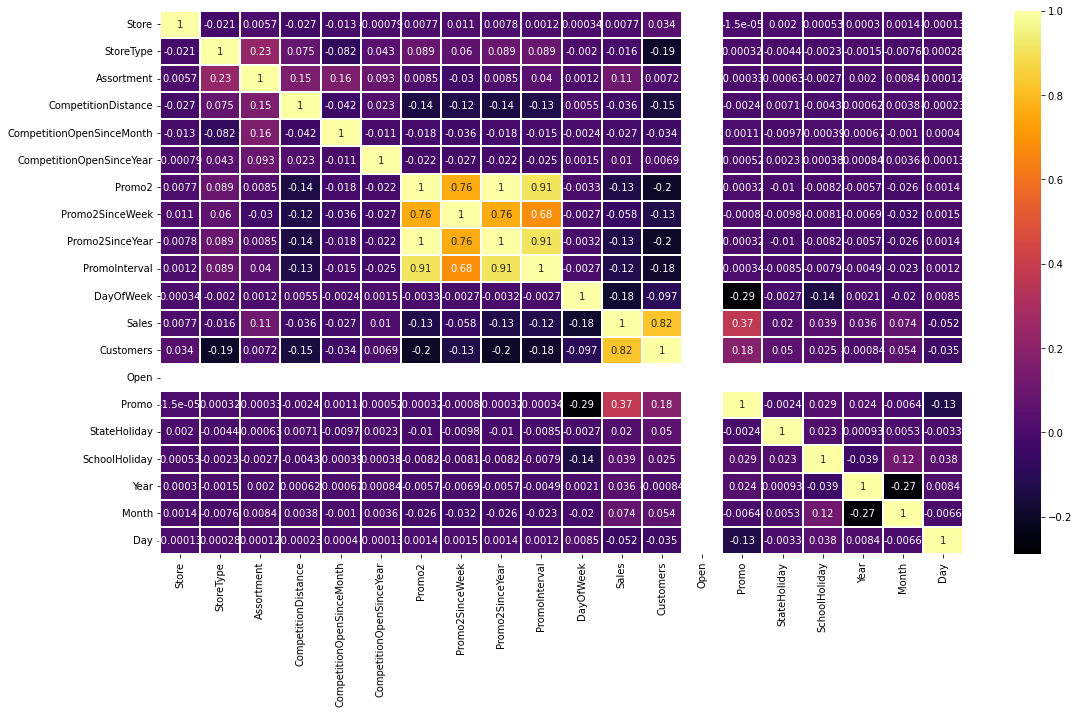

In [155]:
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='inferno')

In [156]:
merged_df.corr()['Sales'].sort_values()

DayOfWeek                   -0.178753
Promo2SinceYear             -0.127581
Promo2                      -0.127556
PromoInterval               -0.120710
Promo2SinceWeek             -0.058493
Day                         -0.051865
CompetitionDistance         -0.036401
CompetitionOpenSinceMonth   -0.026518
StoreType                   -0.016211
Store                        0.007723
CompetitionOpenSinceYear     0.010496
StateHoliday                 0.020106
Year                         0.036151
SchoolHoliday                0.038635
Month                        0.073589
Assortment                   0.109015
Promo                        0.368199
Customers                    0.823552
Sales                        1.000000
Open                              NaN
Name: Sales, dtype: float64

In [145]:
#spliting the dataset
# merged_df=merged_df[(merged_df.Open ==1) & (merged_df.Sales ==0)]
# merged_df=merged_df[(merged_df.Open ==0) & (merged_df.Sales ==0)]

    merged_df = merged_df.drop(merged_df[(merged_df.Open == 0) & (merged_df.Sales == 0)].index)
    merged_df = merged_df.drop(merged_df[(merged_df.Open == 1) & (merged_df.Sales == 0)].index)

    x_feautures=merged_df.drop(['Sales','Customers','Open'],axis=1)
    y_dependent=merged_df['Sales']

    x_feautures.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5,1,0,1,2015,7,31
1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4,1,0,1,2015,7,30
2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,3,1,0,1,2015,7,29
3,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2,1,0,1,2015,7,28
4,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,1,1,0,1,2015,7,27


In [146]:

x=x_feautures.to_numpy()
y=y_dependent.to_numpy()


(844338, 17)

In [79]:
y.dtype

dtype('int64')

In [147]:
#split the dataset into test and train

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=1)

In [148]:
x_train,x_test,y_train,y_test

(array([[7.660e+02, 3.000e+00, 2.000e+00, ..., 2.013e+03, 6.000e+00,
         2.800e+01],
        [3.180e+02, 3.000e+00, 2.000e+00, ..., 2.013e+03, 1.100e+01,
         2.200e+01],
        [1.072e+03, 0.000e+00, 2.000e+00, ..., 2.013e+03, 5.000e+00,
         2.700e+01],
        ...,
        [6.220e+02, 0.000e+00, 2.000e+00, ..., 2.014e+03, 3.000e+00,
         1.900e+01],
        [6.500e+02, 0.000e+00, 0.000e+00, ..., 2.013e+03, 4.000e+00,
         1.000e+01],
        [1.710e+02, 0.000e+00, 0.000e+00, ..., 2.014e+03, 2.000e+00,
         8.000e+00]]),
 array([[4.610e+02, 3.000e+00, 2.000e+00, ..., 2.014e+03, 1.000e+00,
         2.700e+01],
        [3.900e+02, 0.000e+00, 2.000e+00, ..., 2.014e+03, 1.000e+00,
         2.500e+01],
        [9.600e+02, 3.000e+00, 0.000e+00, ..., 2.013e+03, 8.000e+00,
         1.900e+01],
        ...,
        [3.460e+02, 0.000e+00, 2.000e+00, ..., 2.014e+03, 2.000e+00,
         2.400e+01],
        [8.320e+02, 3.000e+00, 0.000e+00, ..., 2.013e+03, 9.000e+00,
   

r2_score: 0.19133395859283253
Mean absolute error: 2033.17
Root mean squared error:  2803.0445448240434


Text(0, 0.5, 'Predicted values')

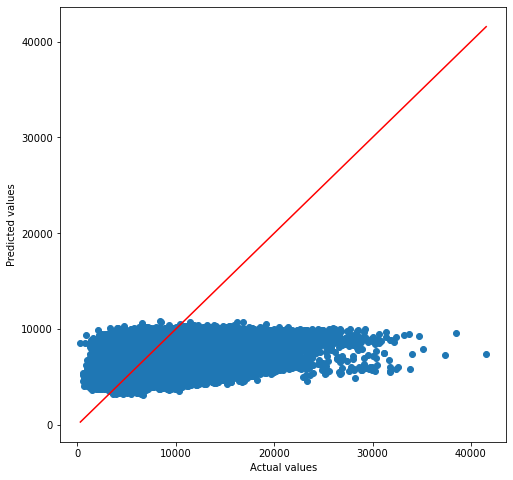

In [149]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_predict = regressor.predict(x_test)

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', m.sqrt(mean_squared_error(y_test,y_predict)))

#Visualizing the linear plot

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)
p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

r2_score: 0.914180871385774
Mean absolute error: 585.35
Root mean squared error:  913.1401666639499


Text(0, 0.5, 'Predicted values')

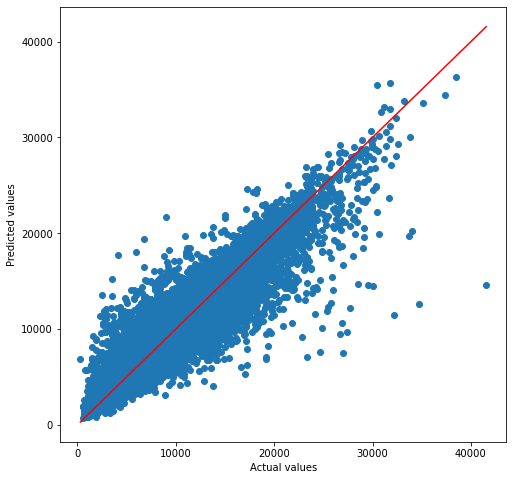

In [153]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)


y_predict = rfr.predict(x_test)

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', m.sqrt(mean_squared_error(y_test,y_predict)))

#Visualizing the linear plot

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)
p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [152]:
#SGDRegressor

from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()
sgdr.fit(x_train,y_train)


y_predict = sgdr.predict(x_test)

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', m.sqrt(mean_squared_error(y_test,y_predict)))

r2_score: -1.80183490989912e+23
Mean absolute error: 804791886899780.25
Root mean squared error:  1323131152802077.5


r2_score: -2.4861963467821516e+24
Mean absolute error: 2643125613924688.00
Root mean squared error:  4903016574180877.0


r2_score: 1.0
Mean absolute error: 0.00
Root mean squared error:  0.0


Text(0, 0.5, 'Predicted values')

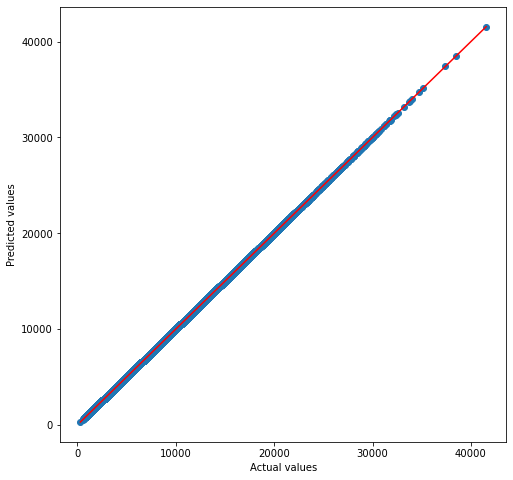

In [150]:
#DecisionTree Regressor

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(x, y)

y_predict = dtr.predict(x_test)

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', m.sqrt(mean_squared_error(y_test,y_predict)))

#Visualizing the linear plot

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)
p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

r2_score: 1.0
Mean absolute error: 0.00
Root mean squared error:  0.0


Text(0, 0.5, 'Predicted values')

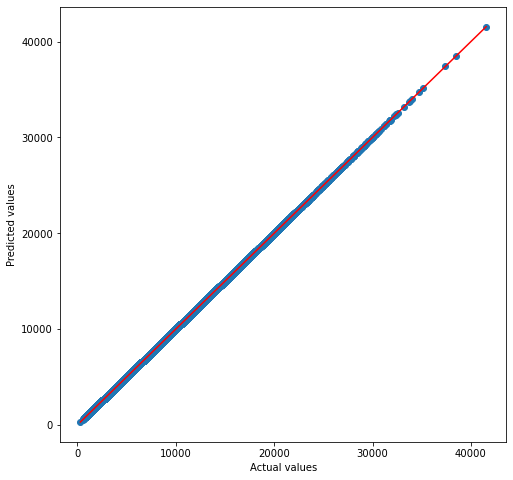

In [151]:
#Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state = 0)
gbr.fit(x, y)

y_predict = dtr.predict(x_test)

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', m.sqrt(mean_squared_error(y_test,y_predict)))

#Visualizing the linear plot

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)
p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')